In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set_style('whitegrid')

In [2]:
# 2. Load the Data
# Using a try, except block to handle csv read gracefully in case it fails to find file whether it is being run
try:
    df = pd.read_csv("CarPrice_Assignment.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("--- ERROR: 'CarPrice_Assignment.csv' not found. ---")
    exit()

Data loaded successfully!


In [4]:
# 3. Clean and Transform the Data
# 'doornumber' and 'cylindernumber' are *text* that we want to use as *numbers*.

print("\n--- Cleaning Data ---")

# We create a "dictionary" to map the words to numbers
num_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5, 
    'six': 6, 'eight': 8, 'twelve': 12
}

# 'map' the columns using dictionary.
# This turns the text "two" into the number 2.
df['doornumber'] = df['doornumber'].map(num_map)
df['cylindernumber'] = df['cylindernumber'].map(num_map)

print("Text numbers ('two', 'four') converted to numeric.")


--- Cleaning Data ---
Text numbers ('two', 'four') converted to numeric.


In [5]:
# 4. Feature Engineering (Create our target)

print("\n--- Creating 'is_premium' Target ---")

# We find the 75th percentile price.
price_threshold = df['price'].quantile(0.75)
print(f"The 'Premium' threshold is set at ${price_threshold:,.2f}")

# Create the new column. 1 = Premium, 0 = Standard
df['is_premium'] = (df['price'] > price_threshold).astype(int)

# Let's see how many 0s and 1s we have.
print("\n--- Class Balance ---")
print("0 = Standard, 1 = Premium")
print(df['is_premium'].value_counts())


--- Creating 'is_premium' Target ---
The 'Premium' threshold is set at $16,503.00

--- Class Balance ---
0 = Standard, 1 = Premium
is_premium
0    154
1     51
Name: count, dtype: int64



--- Generating Plots (EDA) ---
Showing Plot 1: Price Distribution


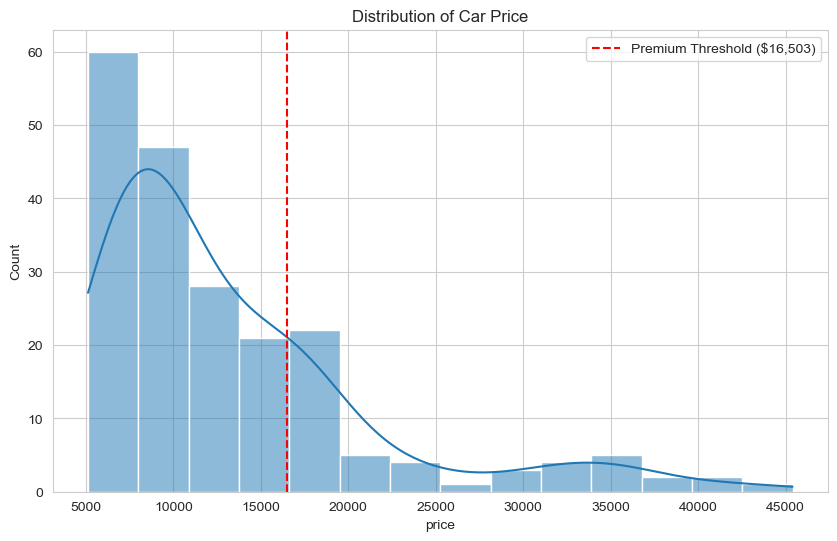

Showing Plot 2: Engine Size vs Price


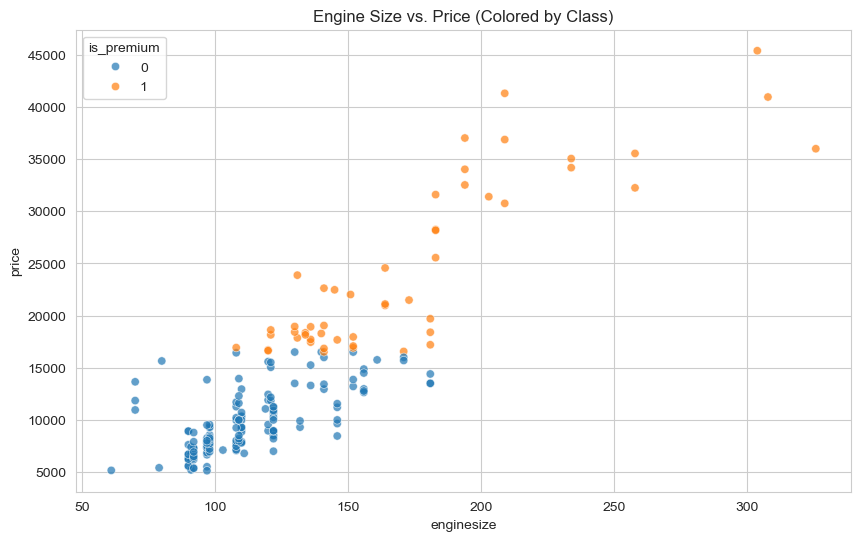

In [6]:
# 5. Exploratory Data Analysis (EDA)

print("\n--- Generating Plots (EDA) ---")

# Plot 1: Price Distribution
print("Showing Plot 1: Price Distribution")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Price')
plt.axvline(price_threshold, color='red', linestyle='--', label=f'Premium Threshold (${price_threshold:,.0f})')
plt.legend()
plt.show()

# Plot 2: Scatter Plot (Engine Size vs Price)
print("Showing Plot 2: Engine Size vs Price")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enginesize', y='price', hue='is_premium', alpha=0.7)
plt.title('Engine Size vs. Price (Colored by Class)')
plt.show()

In [7]:
# 6. Prepare Data for Machine Learning
print("\n--- Preparing Data for Machine LEarning ---")

# 1. Separate features (X) and target (y)
#
# y is our target variable (what we want to predict)
y = df['is_premium']
#
# X is our features. We will select ONLY numeric columns.
X = df.select_dtypes(include=np.number)

# 2. Clean up X
# We have to drop the columns we can't use as features:
# - 'price' (we used it to make the target)
# - 'is_premium' (it IS the target)
# - 'car_ID' (it's just an ID)
# - 'symboling' (it's categorical, even if it looks numeric)
X = X.drop(['price', 'is_premium', 'car_ID', 'symboling'], axis=1)

print("X and y created.")
print(f"Our model will use these {len(X.columns)} features:")
print(list(X.columns))


--- Preparing Data for Machine LEarning ---
X and y created.
Our model will use these 15 features:
['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [8]:
# 7. Split Data into Training and Testing Sets

print("\n--- Splitting Data (80% train, 20% test) ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete.")


--- Splitting Data (80% train, 20% test) ---
Data split complete.


In [9]:
# 8. Build and Train the Model

print("\n--- Building and Training the Model ---")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training complete!")


--- Building and Training the Model ---
Model training complete!



--- Evaluating the Model ---

Model Accuracy: 95.12%

--- Classification Report ---
              precision    recall  f1-score   support

Standard (0)       0.97      0.97      0.97        32
 Premium (1)       0.89      0.89      0.89         9

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41

Showing Plot 3: Confusion Matrix


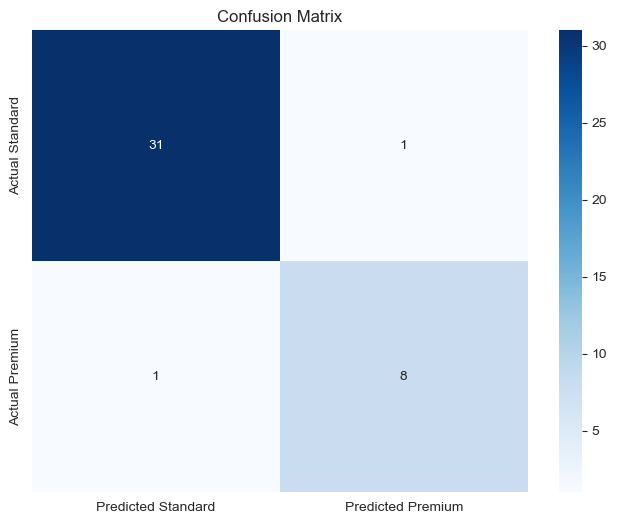

In [10]:
# 9. Make Predictions and Evaluate the Model

print("\n--- Evaluating the Model ---")

# 1. Make predictions on the test data
y_pred = model.predict(X_test)

# 2. Check the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# 3. Print the Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Standard (0)', 'Premium (1)']))

# 4. Show the Confusion Matrix
print("Showing Plot 3: Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted Standard', 'Predicted Premium'],
            yticklabels=['Actual Standard', 'Actual Premium'])
plt.title('Confusion Matrix')
plt.show()


--- Feature Importance ---
These are the features the model used most.
             feature  importance
5         curbweight    0.187314
3           carwidth    0.117705
11        horsepower    0.108269
1          wheelbase    0.104295
7         enginesize    0.098676
14        highwaympg    0.073199
2          carlength    0.063349
6     cylindernumber    0.039287
4          carheight    0.037213
8          boreratio    0.036887
13           citympg    0.034701
12           peakrpm    0.033814
9             stroke    0.030793
10  compressionratio    0.018634
0         doornumber    0.015864
Showing Plot 4: Feature Importance


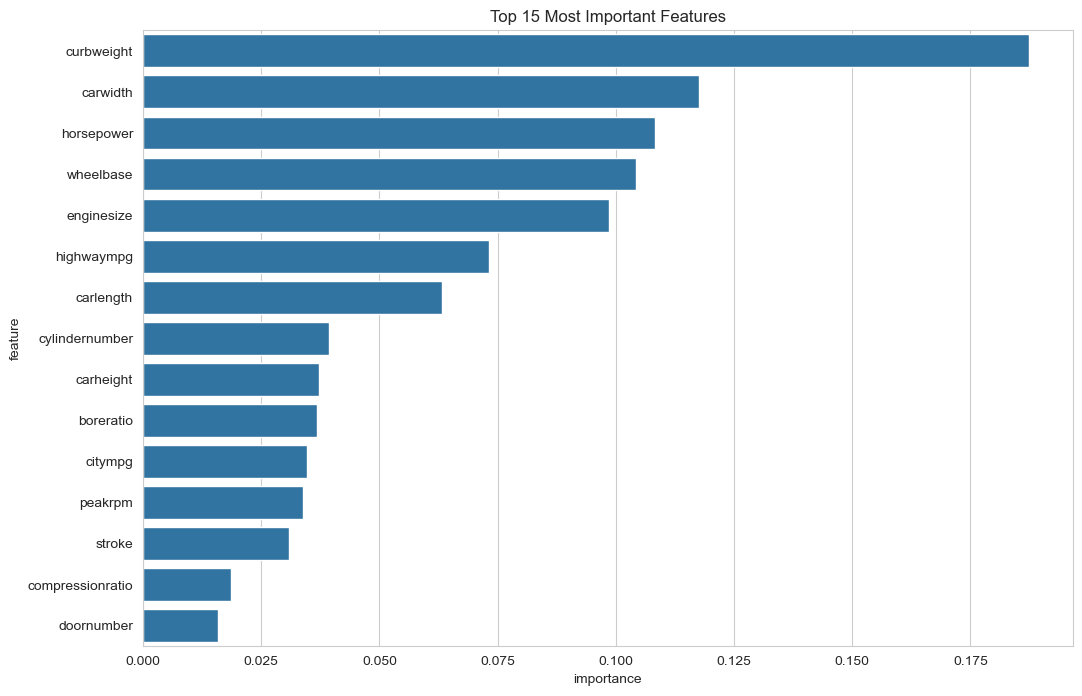


--- Analysis Complete ---


In [11]:
# 10. Check Feature Importance

print("\n--- Feature Importance ---")
print("These are the features the model used most.")

importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort it to see the most important ones at the top
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Print the top 15
print(feature_importance_df.head(15))

# Plot the top features
print("Showing Plot 4: Feature Importance")
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.show()

print("\n--- Analysis Complete ---")